**Project – 1 Documentation**

Scraping and Analysis of Statistics of Sports Players from Real-Time Webpage

**OVERVIEW:**
A project that gives you a better understanding of scraping data from websites and how to analyses them. Usage of various libraries as NumPy, Mat Plot, Pandas.

In the course of completing the project, you use the web scraping function, converting the extracted data into a pandas data Frame, and Storing the analyzed data.

**Problem Statement**

Web scrape basketball statistics from Wikipedia of some of the greatest basketball players and export it as a CSV file format.

**Software Requirements**
1. Programming Language: Python
2. Environment: Jupyter Notebooks / Google Collab
3. Database: CSV (export type)
4. Operation System: Windows XP or above
5. Libraries Used: Beautiful Soup, requests, Pandas, NumPy, boto3, Matplotlib, display





Step 1 : Imported Libraries required for the Project

In [43]:
import bs4             #pulling data out of HTML
import requests       #asking permission to read the html code
import pandas as pd   #preprocess the data

import matplotlib.pyplot as plt  #used to plot the graphs
from IPython.display import display 

Step 2: Defining a Function for Scraping Data from wikipedia (Data Collection & Cleaning Phase)

In [44]:
def get_basketball_stats(links):
    # read the webpage
    response = requests.get(links)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))
            
        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data


Step 3 : considering our parameter values

In [45]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
       ,'https://en.wikipedia.org/wiki/LeBron_James'\
       ,'https://en.wikipedia.org/wiki/Stephen_Curry'\
       ,'https://en.wikipedia.org/wiki/Kevin_Durant',\
      'https://en.wikipedia.org/wiki/James_Harden',\
      'https://en.wikipedia.org/wiki/Kawhi_Leonard',\
      'https://en.wikipedia.org/wiki/Chris_Paul',\
      'https://en.wikipedia.org/wiki/Ben_Simmons',\
      'https://en.wikipedia.org/wiki/Tim_Duncan']
names=['Michael Jordan','Kobe Bryant','lebron james','stephen curry','kelvin durant','james harden',
       'kawhi leonard','chris paul','ben simmons','tim duncan']

Step 4: Performed the Scraping function on our considered parameters

In [46]:
michael_jordan_dict = get_basketball_stats(links[0]);
kobe_bryant_dict = get_basketball_stats(links[1]);
lebron_james_dict=get_basketball_stats(links[2]);
stephen_curry_dict=get_basketball_stats(links[3]);
kelvin_durant_dict=get_basketball_stats(links[4]);
james_harden_dict=get_basketball_stats(links[5]);
kawhi_leonard_dict=get_basketball_stats(links[6]);
chris_paul_dict=get_basketball_stats(links[7]);
ben_simmons_dict=get_basketball_stats(links[8]);
tim_duncan_dict=get_basketball_stats(links[9]);

In [51]:
ben_simmons_dict

{'Games played': [81.0, 79.0, 57.0, 58.0],
 'Games started': [81.0, 79.0, 57.0, 58.0],
 'Minutes per game': [33.7, 34.2, 35.4, 32.4],
 'Field goal percentage': [0.545, 0.563, 0.58, 0.557],
 '3-point field-goal percentage': [0.0, 0.0, 0.286, 0.3],
 'Free-throw percentage': [0.56, 0.6, 0.621, 0.613],
 'Rebounds per game': [8.1, 8.8, 7.8, 7.2],
 'Assists per game': [8.2, 7.7, 8.0, 6.9],
 'Steals per game': [1.7, 1.4, 2.1, 1.6],
 'Blocks per game': [0.9, 0.8, 0.6, 0.6],
 'Points per game': [15.8, 16.9, 16.4, 14.3]}

In [48]:
kawhi_leonard_dict

{'Games played': [64.0, 58.0, 66.0, 64.0, 72.0, 74.0, 9.0, 60.0, 57.0, 52.0],
 'Games started': [39.0, 57.0, 65.0, 64.0, 72.0, 74.0, 9.0, 60.0, 57.0, 52.0],
 'Minutes per game': [24.0,
  31.2,
  29.1,
  31.8,
  33.1,
  33.4,
  23.3,
  34.0,
  32.4,
  34.1],
 'Field goal percentage': [0.493,
  0.494,
  0.522,
  0.479,
  0.506,
  0.485,
  0.468,
  0.496,
  0.47,
  0.512],
 '3-point field-goal percentage': [0.376,
  0.374,
  0.379,
  0.349,
  0.443,
  0.381,
  0.314,
  0.371,
  0.378,
  0.398],
 'Free-throw percentage': [0.773,
  0.825,
  0.802,
  0.802,
  0.874,
  0.88,
  0.816,
  0.854,
  0.886,
  0.885],
 'Rebounds per game': [5.1, 6.0, 6.2, 7.2, 6.8, 5.8, 4.7, 7.3, 7.1, 6.5],
 'Assists per game': [1.1, 1.6, 2.0, 2.5, 2.6, 3.5, 2.3, 3.3, 4.9, 5.2],
 'Steals per game': [1.3, 1.7, 1.7, 2.3, 1.8, 1.8, 2.0, 1.8, 1.8, 1.6],
 'Blocks per game': [0.4, 0.6, 0.8, 0.8, 1.0, 0.7, 1.0, 0.4, 0.6, 0.4],
 'Points per game': [7.9,
  11.9,
  12.8,
  16.5,
  21.2,
  25.5,
  16.2,
  26.6,
  27.1,
  24.8]

In [49]:
james_harden_dict

{'Games played': [76.0,
  82.0,
  62.0,
  78.0,
  73.0,
  81.0,
  82.0,
  81.0,
  72.0,
  78.0,
  68.0,
  8.0,
  36.0],
 'Games started': [0.0,
  5.0,
  2.0,
  78.0,
  73.0,
  81.0,
  82.0,
  81.0,
  72.0,
  78.0,
  68.0,
  8.0,
  35.0],
 'Minutes per game': [22.9,
  26.7,
  31.4,
  38.3,
  38.0,
  36.8,
  38.1,
  36.4,
  35.4,
  36.8,
  36.5,
  36.3,
  36.6],
 'Field goal percentage': [0.403,
  0.436,
  0.491,
  0.438,
  0.456,
  0.44,
  0.439,
  0.44,
  0.449,
  0.442,
  0.444,
  0.444,
  0.471],
 '3-point field-goal percentage': [0.375,
  0.349,
  0.39,
  0.368,
  0.366,
  0.375,
  0.359,
  0.347,
  0.367,
  0.368,
  0.355,
  0.347,
  0.366],
 'Free-throw percentage': [0.808,
  0.843,
  0.846,
  0.851,
  0.866,
  0.868,
  0.86,
  0.847,
  0.858,
  0.879,
  0.865,
  0.883,
  0.856],
 'Rebounds per game': [3.2,
  3.1,
  4.1,
  4.9,
  4.7,
  5.7,
  6.1,
  8.1,
  5.4,
  6.6,
  6.6,
  5.1,
  8.5],
 'Assists per game': [1.8,
  2.1,
  3.7,
  5.8,
  6.1,
  7.0,
  7.5,
  11.2,
  8.8,
  7.5,


In [50]:
michael_jordan_dict

{'Games played': [82.0,
  18.0,
  82.0,
  82.0,
  81.0,
  82.0,
  82.0,
  80.0,
  78.0,
  17.0,
  82.0,
  82.0,
  82.0,
  60.0,
  82.0],
 'Games started': [82.0,
  7.0,
  82.0,
  82.0,
  81.0,
  82.0,
  82.0,
  80.0,
  78.0,
  17.0,
  82.0,
  82.0,
  82.0,
  53.0,
  67.0],
 'Minutes per game': [38.3,
  25.1,
  40.0,
  40.4,
  40.2,
  39.0,
  37.0,
  38.8,
  39.3,
  39.3,
  37.7,
  37.9,
  38.8,
  34.9,
  37.0],
 'Field goal percentage': [0.515,
  0.457,
  0.482,
  0.535,
  0.538,
  0.526,
  0.539,
  0.519,
  0.495,
  0.411,
  0.495,
  0.486,
  0.465,
  0.416,
  0.445],
 '3-point field-goal percentage': [0.173,
  0.167,
  0.182,
  0.132,
  0.276,
  0.376,
  0.312,
  0.27,
  0.352,
  0.5,
  0.427,
  0.374,
  0.238,
  0.189,
  0.291],
 'Free-throw percentage': [0.845,
  0.84,
  0.857,
  0.841,
  0.85,
  0.848,
  0.851,
  0.832,
  0.837,
  0.801,
  0.834,
  0.833,
  0.784,
  0.79,
  0.821],
 'Rebounds per game': [6.5,
  3.6,
  5.2,
  5.5,
  8.0,
  6.9,
  6.0,
  6.4,
  6.7,
  6.9,
  6.6,
  

In [ ]:
kobe_bryant_dict

In [ ]:
lebron_james_dict

Step 5: Converting the whole data in the form of dictionaries to Dataframes for exploratory analsyis (Data Wrangling)

In [ ]:
stephen_curry_dict

In [ ]:
kelvin_durant_dict

In [52]:
mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
lj_table = pd.DataFrame(lebron_james_dict)
sc_table = pd.DataFrame(stephen_curry_dict)
kd_table = pd.DataFrame(kelvin_durant_dict)
jh_table = pd.DataFrame(james_harden_dict)
kl_table = pd.DataFrame(kawhi_leonard_dict)
cp_table = pd.DataFrame(chris_paul_dict)
bs_table = pd.DataFrame(ben_simmons_dict)
td_table = pd.DataFrame(tim_duncan_dict)

In [57]:
bs_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,81.0,81.0,33.7,0.545,0.000,0.560,8.1,8.2,1.7,0.9,15.8
1,79.0,79.0,34.2,0.563,0.000,0.600,8.8,7.7,1.4,0.8,16.9
2,57.0,57.0,35.4,0.580,0.286,0.621,7.8,8.0,2.1,0.6,16.4
3,58.0,58.0,32.4,0.557,0.300,0.613,7.2,6.9,1.6,0.6,14.3


In [58]:
lj_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0
5,81.0,81.0,37.7,0.489,0.344,0.780,7.6,7.2,1.7,1.1,28.4
6,76.0,76.0,39.0,0.503,0.333,0.767,7.3,8.6,1.6,1.0,29.7
7,79.0,79.0,38.8,0.510,0.330,0.759,7.5,7.0,1.6,0.6,26.7
8,62.0,62.0,37.5,0.531,0.362,0.771,7.9,6.2,1.9,0.8,27.1
9,76.0,76.0,37.9,0.565,0.406,0.753,8.0,7.3,1.7,0.9,26.8


In [55]:
kd_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,80.0,34.6,0.430,0.288,0.873,4.4,2.4,1.0,0.9,20.3
1,74.0,74.0,39.0,0.476,0.422,0.863,6.5,2.8,1.3,0.7,25.3
2,82.0,82.0,39.5,0.476,0.365,0.900,7.6,2.8,1.4,1.0,30.1
3,78.0,78.0,38.9,0.462,0.350,0.880,6.8,2.7,1.1,1.0,27.7
4,66.0,66.0,38.6,0.496,0.387,0.860,8.0,3.5,1.3,1.2,28.0
5,81.0,81.0,38.5,0.510,0.416,0.905,7.9,4.6,1.4,1.3,28.1
6,81.0,81.0,38.5,0.503,0.391,0.873,7.4,5.5,1.3,0.7,32.0
7,27.0,27.0,33.8,0.510,0.403,0.854,6.6,4.1,0.9,0.9,25.4
8,72.0,72.0,35.8,0.505,0.388,0.898,8.2,5.0,1.0,1.2,28.2
9,62.0,62.0,33.4,0.537,0.375,0.875,8.3,4.9,1.1,1.6,25.1


In [ ]:
mj_table

In [54]:
kb_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5
5,80.0,80.0,38.3,0.469,0.250,0.829,5.5,5.5,1.5,0.4,25.2
6,82.0,82.0,41.5,0.451,0.383,0.843,6.9,5.9,2.2,0.8,30.0
7,65.0,64.0,37.6,0.438,0.327,0.852,5.5,5.1,1.7,0.4,24.0
8,66.0,66.0,40.7,0.433,0.339,0.816,5.9,6.0,1.3,0.8,27.6
9,80.0,80.0,41.0,0.450,0.347,0.850,5.3,4.5,1.8,0.4,35.4


In [ ]:
sc_table

In [59]:
list_table =[mj_table, kb_table,lj_table,sc_table,kd_table,jh_table,kl_table,cp_table,bs_table,td_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].head())
    i += 1
    

Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


lebron james


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


stephen curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


kelvin durant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,80.0,34.6,0.430,0.288,0.873,4.4,2.4,1.0,0.9,20.3
1,74.0,74.0,39.0,0.476,0.422,0.863,6.5,2.8,1.3,0.7,25.3
2,82.0,82.0,39.5,0.476,0.365,0.900,7.6,2.8,1.4,1.0,30.1
3,78.0,78.0,38.9,0.462,0.350,0.880,6.8,2.7,1.1,1.0,27.7
4,66.0,66.0,38.6,0.496,0.387,0.860,8.0,3.5,1.3,1.2,28.0


james harden


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,76.0,0.0,22.9,0.403,0.375,0.808,3.2,1.8,1.1,0.3,9.9
1,82.0,5.0,26.7,0.436,0.349,0.843,3.1,2.1,1.1,0.3,12.2
2,62.0,2.0,31.4,0.491,0.390,0.846,4.1,3.7,1.0,0.2,16.8
3,78.0,78.0,38.3,0.438,0.368,0.851,4.9,5.8,1.8,0.5,25.9
4,73.0,73.0,38.0,0.456,0.366,0.866,4.7,6.1,1.6,0.4,25.4


kawhi leonard


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,64.0,39.0,24.0,0.493,0.376,0.773,5.1,1.1,1.3,0.4,7.9
1,58.0,57.0,31.2,0.494,0.374,0.825,6.0,1.6,1.7,0.6,11.9
2,66.0,65.0,29.1,0.522,0.379,0.802,6.2,2.0,1.7,0.8,12.8
3,64.0,64.0,31.8,0.479,0.349,0.802,7.2,2.5,2.3,0.8,16.5
4,72.0,72.0,33.1,0.506,0.443,0.874,6.8,2.6,1.8,1.0,21.2


chris paul


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,78.0,78.0,36.0,0.430,0.282,0.847,5.1,7.8,2.2,0.1,16.1
1,64.0,64.0,36.8,0.437,0.350,0.818,4.4,8.9,1.8,0.0,17.3
2,80.0,80.0,37.6,0.488,0.369,0.851,4.0,11.6,2.7,0.1,21.1
3,78.0,78.0,38.5,0.503,0.364,0.868,5.5,11.0,2.8,0.1,22.8
4,45.0,45.0,38.0,0.493,0.409,0.847,4.2,10.7,2.1,0.2,18.7


ben simmons


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,81.0,81.0,33.7,0.545,0.000,0.560,8.1,8.2,1.7,0.9,15.8
1,79.0,79.0,34.2,0.563,0.000,0.600,8.8,7.7,1.4,0.8,16.9
2,57.0,57.0,35.4,0.580,0.286,0.621,7.8,8.0,2.1,0.6,16.4
3,58.0,58.0,32.4,0.557,0.300,0.613,7.2,6.9,1.6,0.6,14.3


tim duncan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,39.1,0.549,0.000,0.662,11.9,2.7,0.7,2.5,21.1
1,50.0,50.0,39.3,0.495,0.143,0.690,11.4,2.4,0.9,2.5,21.7
2,74.0,74.0,38.9,0.490,0.091,0.761,12.4,3.2,0.9,2.2,23.2
3,82.0,82.0,38.7,0.499,0.259,0.618,12.2,3.0,0.9,2.3,22.2
4,82.0,82.0,40.6,0.508,0.100,0.799,12.7,3.7,0.7,2.5,25.5


Step 6: Visualizng a Line Graph for both players (Data Visualiation)

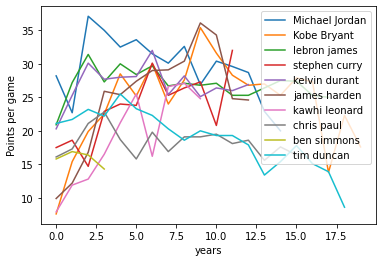

In [60]:
j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

**CONCLUSION:**
Few important libraries were imported for data preprocessing and visualisation.
later we collected(Web scrapped) and preprocess the data 
now we converted the raw data into dataframes,
then using matplotlib we visualised the data.